### Importação dos dados



In [4]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [19]:
precos_lojas = [loja["Preço"], loja2["Preço"], loja3["Preço"], loja4["Preço"]]

In [20]:
faturamento_lojas= []
for i, precos in enumerate(precos_lojas, start=1):
  faturamento = sum(precos)
  faturamento_lojas.append(faturamento)
  print(f'faturamento da loja{i}: {round(faturamento,2)}')


faturamento da loja1: 1534509.12
faturamento da loja2: 1488459.06
faturamento da loja3: 1464025.03
faturamento da loja4: 1384497.58


In [11]:
!pip install matplotlib

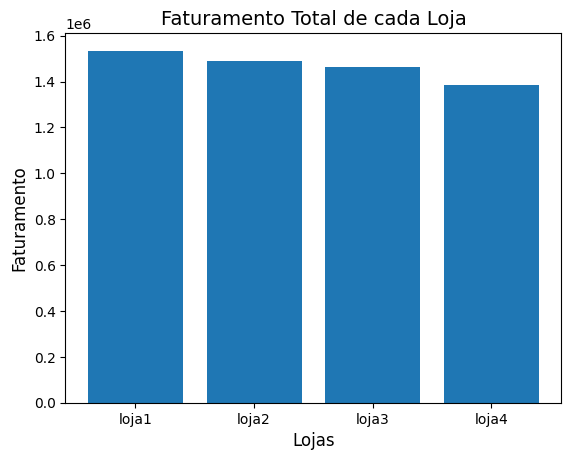

In [31]:
import matplotlib.pyplot as plt
lojas = ['loja1', 'loja2', 'loja3', 'loja4']
plt.bar(lojas, faturamento_lojas)
plt.title('Faturamento Total de cada Loja', fontsize=14)
plt.xlabel('Lojas', fontsize=12)
plt.ylabel('Faturamento', fontsize=12)

plt.show()

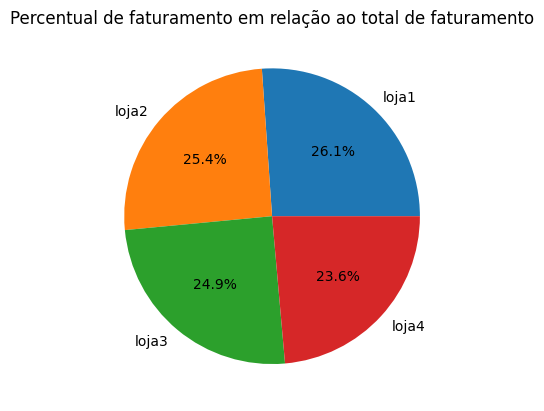

In [53]:
porcentagem_faturamento = []
for i in range(len(faturamento_lojas)):
  porcentagem = (100 * faturamento_lojas[i]) / sum(faturamento_lojas)
  porcentagem_faturamento.append(round(porcentagem,1))

porcentagem_faturamento

plt.pie(porcentagem_faturamento, labels=lojas, autopct='%1.1f%%')
plt.title('Percentual de faturamento em relação ao total de faturamento')
plt.show()


# 2. Vendas por Categoria


In [44]:
nome_categorias = list(set(loja['Categoria do Produto']))
categorias_lojas = [list(loja['Categoria do Produto']), list(loja2['Categoria do Produto']), list(loja3['Categoria do Produto']), list(loja4['Categoria do Produto'])]

In [43]:
total_vendas_categorias = []
for categoria in categorias_lojas:
  vendas_por_categoria = [categoria.count(nome) for nome in nome_categorias]
  total_vendas_categorias.append(vendas_por_categoria)

print('Vendas por categorias')
for i, vendas in enumerate(total_vendas_categorias):
  print(f'loja{i+1}')
  for j, nome in enumerate(nome_categorias):
    print(f'Categoria:{nome}\nVendas da Categoria:{total_vendas_categorias[i][j]}')

Vendas por categorias
loja1
Categoria:eletronicos
Vendas da Categoria:448
Categoria:eletrodomesticos
Vendas da Categoria:312
Categoria:instrumentos musicais
Vendas da Categoria:182
Categoria:brinquedos
Vendas da Categoria:324
Categoria:livros
Vendas da Categoria:173
Categoria:utilidades domesticas
Vendas da Categoria:171
Categoria:moveis
Vendas da Categoria:465
Categoria:esporte e lazer
Vendas da Categoria:284
loja2
Categoria:eletronicos
Vendas da Categoria:422
Categoria:eletrodomesticos
Vendas da Categoria:305
Categoria:instrumentos musicais
Vendas da Categoria:224
Categoria:brinquedos
Vendas da Categoria:313
Categoria:livros
Vendas da Categoria:197
Categoria:utilidades domesticas
Vendas da Categoria:181
Categoria:moveis
Vendas da Categoria:442
Categoria:esporte e lazer
Vendas da Categoria:275
loja3
Categoria:eletronicos
Vendas da Categoria:451
Categoria:eletrodomesticos
Vendas da Categoria:278
Categoria:instrumentos musicais
Vendas da Categoria:177
Categoria:brinquedos
Vendas da Cate

# 3. Média de Avaliação das Lojas

In [35]:
avaliacao_lojas = [list(loja['Avaliação da compra']), list(loja2['Avaliação da compra']), list(loja3['Avaliação da compra']), list(loja4['Avaliação da compra'])]


In [36]:
def medias_avaliacao(lista_avaliacoes: list) -> float:
  media = sum(lista_avaliacoes) / len(lista_avaliacoes)
  return round(media,2)

medias_avaliacoes = [medias_avaliacao(lista_avaliacoes_loja) for lista_avaliacoes_loja in avaliacao_lojas]

for i in range(len(medias_avaliacoes)):
  print(f'Média das Avaliações dos clientes da loja{i+1}: {medias_avaliacoes[i]}')

Média das Avaliações dos clientes da loja1: 3.98
Média das Avaliações dos clientes da loja2: 4.04
Média das Avaliações dos clientes da loja3: 4.05
Média das Avaliações dos clientes da loja4: 4.0


# 4. Produtos Mais e Menos Vendidos

In [ ]:
produtos_lojas = [list(loja['Produto']),list(loja2['Produto']),list(loja3['Produto']),list(loja4['Produto'])]

In [ ]:
def contagem_produtos(lista_produtos):
  nome_produtos = list(set(lista_produtos))
  quantidade_vendididos = {nome: lista_produtos.count(nome) for nome in nome_produtos}
  return quantidade_vendididos

for i in range(len(produtos_lojas)):
  quantidade_vendidos = contagem_produtos(produtos_lojas[i])
  mais_vendido = max(quantidade_vendidos, key=quantidade_vendidos.get)
  menos_vendido = min(quantidade_vendidos, key=quantidade_vendidos.get)
  print(f'loja{i+1} ')
  print(f'produto mais vendido: {mais_vendido}')
  print(f'produto menos vendido: {menos_vendido}')


loja1 
produto mais vendido: Micro-ondas
produto menos vendido: Celular ABXY
loja2 
produto mais vendido: Iniciando em programação
produto menos vendido: Jogo de tabuleiro
loja3 
produto mais vendido: Kit banquetas
produto menos vendido: Blocos de montar
loja4 
produto mais vendido: Cama box
produto menos vendido: Guitarra


# 5. Frete Médio por Loja


In [6]:
fretes_lojas = [list(loja['Frete']), list(loja2['Frete']), list(loja3['Frete']), list(loja4['Frete'])]

In [37]:
def media_frete(lista_fretes: list) -> float:
  media = sum(lista_fretes) / len(lista_fretes)
  return round(media,2)

valor_medio_frete = [media_frete(lista_fretes) for lista_fretes in fretes_lojas]

for i in range(len(valor_medio_frete)):
  print(f'Média dos valores dos fretes da loja{i+1}: R${valor_medio_frete[i]}')

Média dos valores dos fretes da loja1: R$34.69
Média dos valores dos fretes da loja2: R$33.62
Média dos valores dos fretes da loja3: R$33.07
Média dos valores dos fretes da loja4: R$31.28


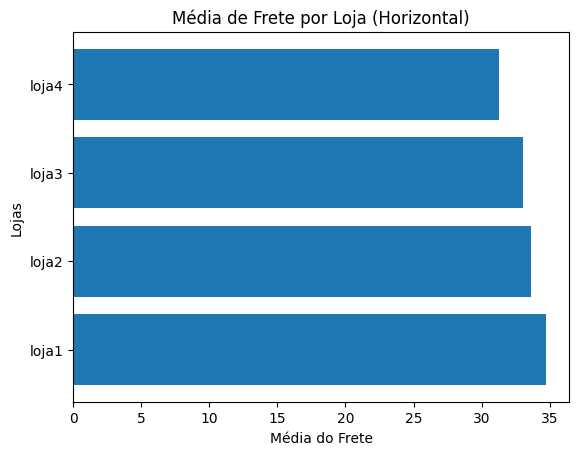

In [38]:
plt.barh(lojas, valor_medio_frete)
plt.title('Média de Frete por Loja (Horizontal)')
plt.xlabel('Média do Frete')
plt.ylabel('Lojas')
plt.show()

# Reltório Final


# 📊 Relatório Comparativo de Performance das Lojas

## 📝 Introdução

O presente relatório tem como objetivo realizar uma análise comparativa entre quatro lojas, com base em indicadores-chave de desempenho: **faturamento, avaliação média dos clientes, valor médio do frete**, e **perfil dos produtos mais e menos vendidos**. A partir dessa análise, buscamos determinar qual loja se apresenta como a **melhor candidata para venda**, considerando seu desempenho atual e seu potencial estratégico, além de identificar qual loja tem o desempenho mais fraco.

---

## 📈 Análise dos Indicadores

### 1. **Faturamento Total**

| Loja   | Faturamento (R$)     |
|--------|----------------------|
| **Loja 1** | **1.534.509,12** ✅ |
| Loja 2 | 1.488.459,06         |
| Loja 3 | 1.464.025,03         |
| **Loja 4** | **1.384.497,58** ❌ |

> A Loja 1 lidera com folga em faturamento, demonstrando maior capacidade de geração de receita. A Loja 4 é a que menos fatura.

---

### 2. **Média das Avaliações dos Clientes**

| Loja   | Avaliação Média (⭐)  |
|--------|----------------------|
| **Loja 3** | **4.05** ✅         |
| Loja 2 | 4.04                |
| Loja 4 | 4.00                |
| **Loja 1** | **3.98** ❌         |

> A Loja 3 tem a melhor avaliação média dos clientes, o que sugere uma boa experiência de compra. A Loja 1 tem a menor média, embora ainda próxima das demais.

---

### 3. **Valor Médio do Frete**

| Loja   | Frete Médio (R$)     |
|--------|----------------------|
| **Loja 4** | **31,28** ✅         |
| Loja 3 | 33,07                |
| Loja 2 | 33,62                |
| **Loja 1** | **34,69** ❌         |

> A Loja 4 possui o frete mais acessível, enquanto a Loja 1 apresenta o maior custo de entrega — um ponto de atenção, embora compensado pelo seu faturamento elevado.

---

### 4. **Análise dos Produtos em Destaque**

| Loja   | Mais Vendido       | Menos Vendido        |
|--------|---------------------|----------------------|
| Loja 1 | Micro-ondas         | Celular ABXY         |
| Loja 2 | Livro técnico       | Jogo de tabuleiro    |
| Loja 3 | Kit de banquetas    | Blocos de montar     |
| Loja 4 | Cama box            | Guitarra             |

> A Loja 1 destaca-se com produtos de ticket médio relevante como micro-ondas e móveis. A Loja 4 teve como produto menos vendido uma guitarra — um item de valor alto e nichado, que pode estar desalinhado com o perfil de consumo.

---

## ✅ Conclusão e Recomendação Estratégica

### 🟢 Melhor Loja para Venda: **Loja 1**

A **Loja 1** se posiciona como a melhor candidata à venda por apresentar um conjunto sólido de atributos comerciais:

1. **Desempenho Financeiro Superior**  
   Liderança em faturamento (R$ 1.534.509,12), evidenciando forte presença de mercado e capacidade de conversão em vendas.

2. **Mix de Produtos com Alta Demanda**  
   Forte atuação em categorias de alto giro como móveis, eletrônicos e brinquedos, o que garante resiliência e diversificação nas vendas.

3. **Alto Potencial de Valorização**  
   Apesar de ter a média de avaliação mais baixa (3.98) e frete mais caro, esses são pontos facilmente ajustáveis, especialmente se a loja for integrada a uma operação com logística mais eficiente e estratégias de melhoria no atendimento ao cliente.

**Conclusão:**  
Com uma base financeira robusta e estrutura de vendas bem estabelecida, a Loja 1 é a **mais atrativa para venda**. Pequenos ajustes podem elevar ainda mais sua lucratividade e atratividade para investidores.

---

### 🔴 Loja com Pior Desempenho: **Loja 4**

A **Loja 4** apresenta os sinais mais fracos entre as quatro analisadas:

- Menor faturamento absoluto.
- Apesar do menor frete, isso não se converteu em vantagem competitiva.
- Avaliação mediana e ausência de liderança em qualquer critério estratégico.
- Indícios de sortimento desalinhado (produto menos vendido: guitarra).

**Conclusão:**  
A Loja 4 demonstra **baixo desempenho financeiro** e **fraca tração de mercado**, sendo a **menos indicada para venda imediata** e, caso permaneça em operação, requer uma revisão estratégica mais profunda.
